# Partie I : Etude théorique
Référence : https://towardsdatascience.com/understanding-conditional-variational-autoencoders-cd62b4f57bf8

## Conditional Variational Autoencoder (CVAE)

Un **Conditional Variational Autoencoder** (CVAE) est une variante du *Variational Autoencoder* (VAE) où la génération des données est conditionnée par une variable supplémentaire, généralement une étiquette de classe. Contrairement au VAE standard, qui génère des données en fonction d'une variable latente non supervisée, le CVAE utilise des informations supplémentaires (comme des labels) pour guider la génération des données. Cela en fait un modèle **supervisé**.


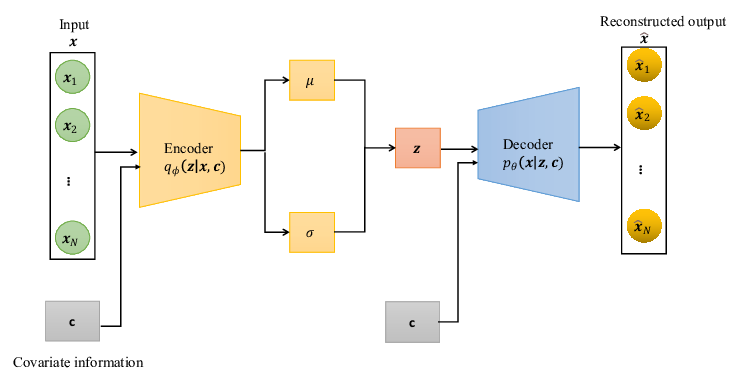

## Architecture du CVAE

L'architecture du CVAE se compose de trois parties principales :

1. **L'encodeur (Encoder)** : 
   - L'encodeur prend une entrée $(x)$ et une condition $(c)$ (par exemple, un label de classe) et génère une distribution latente $(q(z|x,c))$, qui est généralement une distribution gaussienne paramétrée par sa moyenne et sa variance.
   - La sortie de l'encodeur est utilisée pour échantillonner un vecteur latent $(z)$, ce qui introduit une régularisation de l'espace latent via la divergence de Kullback-Leibler (KL) (force  $(q(z|x,c))$ d'être proche de $\mathcal{N}(0,1)$
).
2. **L'espace latent (Latent Space)** :
   - L'espace latent $(z)$ est une représentation comprimée des données d'entrée $(x)$, et il est influencé par la condition $(c).$ Cette espace latent peut être vu comme une **distribution probabiliste**.
   - Le modèle est appris de manière à ce que cette distribution capture les caractéristiques pertinentes des données en fonction de la condition $(c)$.
3. **Le décodeur (Decoder)** :
   - Le décodeur prend à la fois le vecteur latent $(z)$ et la condition $(c)$ comme entrée et génère la reconstruction de l'entrée $(x)$. L'objectif est de produire des échantillons réalistes qui sont conditionnés sur $(c)$.
   - La sortie du décodeur est une distribution de probabilités sur les valeurs possibles de $(x)$, et la reconstruction doit être aussi proche que possible de l'entrée originale.

## Fonction de Perte du CVAE

La fonction de perte du CVAE combine deux termes principaux :

1. **Perte de Reconstruction** :
   - La perte de reconstruction mesure la différence entre l'entrée ($x$) et la sortie reconstruite $\hat{x}$, tout en prenant en compte la condition $(c)$. Cette perte est souvent calculée en utilisant l'entropie croisée binaire pour les images binaires ou l'erreur quadratique moyenne (MSE) pour les images en couleur.
   
   - La perte de reconstruction est formulée comme suit :
   $- \mathbb{E}_{q(z | x, c)} [\log p(x | z, c)]$ Cela représente l'espérance de la log-vraisemblance de la reconstruction des données conditionnée par $(c).$

2. **Divergence de Kullback-Leibler (KL)** :
   - La divergence KL régularise l'espace latent pour encourager la distribution $q(z | x, c)$ (l'encodeur) à se rapprocher de la distribution normale standard $p(z | c)$ (la distribution prior sur $(z)$ donnée $(c).$
   
   - La divergence KL est exprimée comme : $\text{KL}(q(z | x, c) \| p(z | c))$  Cela permet d’assurer que l’espace latent reste bien structuré et facilite l’échantillonnage.

#### La fonction de perte totale du CVAE est donc : $-\mathbb{E}_{q(z | x, c)} [\log p(x | z, c)] + \text{KL}(q(z | x, c) \| p(z | c))$

### Démonstration que l'espérance de la log-vraisemblance se réduit à une perte MSE dans le cas continue et BCE en discret

### En Continue
Si on suppose que $x$ conditionné par $z$ et $c$ suit une loi multinormale : $p(x|z, c) = \mathcal{N}(\mu(z, c), \sigma^2I)$
avec :
- $\mu(z, c)$ : le vecteur moyen prédit par le décodeur,
- $\sigma^2I$ : est la matrice de covariance diagonale (souvent  $\sigma^2$ est fixé pour simplifier le modèle).

La log-vraisemblance de $p(x|z, c)$ est alors :
$$
\log p(x|z, c) = -\frac{d}{2} \log(2\pi) - \frac{d}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \|x - \mu(z, c)\|^2,
$$
où $\|x - \mu(z, c)\|^2$ représente la norme euclidienne au carré.

Prenons maintenant l'espérance de la log-vraisemblance par rapport à $q(z|x, c)$ :
$$
\mathbb{E}_{z \sim q(z|x,c)}[\log p(x|z, c)] = \mathbb{E}_{z \sim q(z|x,c)} \left[ -\frac{d}{2} \log(2\pi) - \frac{d}{2} \log(\sigma^2) - \frac{\|x - \mu(z, c)\|^2}{2\sigma^2} \right]\propto -\frac{1}{2\sigma^2} \mathbb{E}_{z \sim q(z|x,c)} \left[ \|x - \mu(z, c)\|^2 \right].
$$

Minimiser $-\mathbb{E}_{z \sim q(z|x,c)}[\log p(x|z, c)]$ revient donc à minimiser la perte suivante :
$$
\mathcal{L}_{\text{reconstruction}} = \mathbb{E}_{z \sim q(z|x,c)} \left[ \|x - \mu(z, c)\|^2 \right]=\int_z \left[ \|x - \mu(z, c)\|^2 \right] q(z|x, c) \, dz,.
$$

En pratique, l’espérance $\mathbb{E}_{z \sim q(z|x,c)} \left[ \|x - \mu(z, c)\|^2 \right]$ est approximée en échantillonnant $K$ points $z_i \sim q(z|x,c)$ :
$$
\mathbb{E}_{z \sim q(z|x,c)} \left[ \|x - \mu(z, c)\|^2 \right] \approx \frac{1}{K} \sum_{i=1}^K \|x - \mu(z_i, c)\|^2= \|x - \hat{x}\|^2.
$$
où $z_i \sim q(z|x, c)$ sont $K$ échantillons tirés de $q(z|x, c).$

### En discret 
On suppose que chaque composante   $x_i$ de $x$ conditionné par $z$ et $c$ suit une loi binomiale : $\displaystyle p(x_i|z, c) = \text{Bernoulli}(\mu_i(z, c))$. Ainsi, la probabilité jointe pour $x$ est donnée par : $\displaystyle p(x|z, c) = \prod_{i=1}^N \mu_i(z, c)^{x_i} (1 - \mu_i(z, c))^{1 - x_i}.$

La log-vraisemblance de $p(x|z, c)$ est alors :
$\displaystyle \log p(x|z, c) = \sum_{i=1}^N \Big[x_i \log \mu_i(z, c) + (1 - x_i) \log (1 - \mu_i(z, c))\Big].$

On obtient : $\displaystyle \mathbb{E}_{z \sim q(z|x,c)}[\log p(x|z, c)] = \sum_{i=1}^N \mathbb{E}_{z \sim q(z|x,c)} \Big[x_i \log \mu_i(z, c) + (1 - x_i) \log (1 - \mu_i(z, c))\Big].$

En pratique, on utilise des échantillons Monte Carlo pour approximer l'espérance :
$$
\mathbb{E}_{z \sim q(z|x,c)}[\log p(x|z, c)] \approx \frac{1}{K} \sum_{j=1}^K \sum_{i=1}^N \Big[x_i \log \mu_i(z_j, c) + (1 - x_i) \log (1 - \mu_i(z_j, c))\Big]=\sum_{i=1}^N \Big[x_i \log \hat{x_i} + (1 - x_i) \log (1 - \hat{x_i})\Big],
$$
où $z_j \sim q(z|x, c)$ sont $K$ échantillons du vecteur latent.

### Formule pour KL divergence
Que ca soit en classification ou régression la formule de KL divergence se simplifie en 
$\displaystyle D_{\text{KL}} = \frac{1}{2} \sum_{j=1}^d \left[ \log \frac{1}{\sigma_j^2} - 1 + \sigma_j^2 + \mu_j^2 \right]$, avec 
$\mu_j$ et $\sigma_j$​ sont les paramètres de la distribution $q(z∣x)$ et $d$ est la dimension de $z$.


# Partie II : Train a CVAE on the Fashion-MNIST dataset
référence : https://www.kaggle.com/code/artemsolomko/encoders-on-mnist-pytorch#Conditional-VAE

#### Télécharger Fashion-MNIST dataset
Fashion-MNIST est un peu plus complexe que MNIST en raison de ses textures et formes variés, ce qui en fait une bonne référence pour tester de nouveaux modèles qui seraient trop simples à évaluer avec MNIST.

In [1]:
import torch 
import torchvision
from torchvision import transforms
from torchvision.datasets import FashionMNIST
transform = transforms.Compose([transforms.ToTensor()])#on transforme les images à l'intervalle [0,1]

dataset = FashionMNIST('./data', transform=transform, download=True)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Training on',DEVICE)


Training on cpu


In [98]:
class_names = ["T-shirt/top", "Pantalon", "Pull", "Robe", "Manteau", 
               "Sandale", "Chemise", "Baskets", "Sac", "Bottes"]

Diviser les données en trois parties : test, entraînement et évaluation.

In [3]:
batch_size = 64

from torch.utils import data
from torch.utils.data import DataLoader

train_data,valuation_data = data.random_split(dataset, (50000,10000))
train_dataset = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataset = DataLoader(valuation_data, batch_size=batch_size, shuffle=True)

Observons quelques images. Avec next(iter(train_dataset)), nous accédons à chaque fois à un batch de 64 images différentes issues de notre dataset.

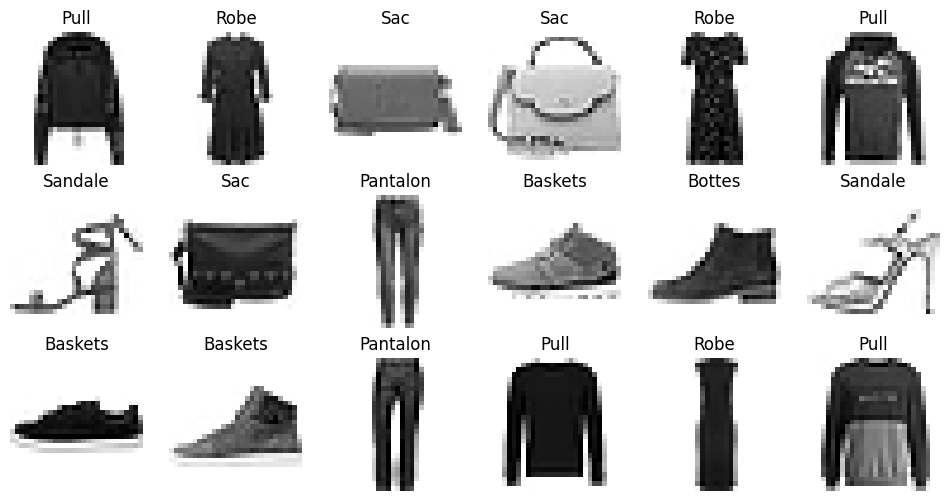

In [4]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
def plot_gallery(images,labels,n_row=3, n_col=6):
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.axis("off")
        plt.imshow(images[i].reshape(28,28), cmap = matplotlib.cm.binary)
        plt.title(class_names[labels[i]])
    plt.show()
first_batch = next(iter(train_dataset))#remarquer que les données changent chaque fois qu'on appele dataloader
images, labels = first_batch
plot_gallery(images,labels)    

In [5]:
# fixer la graine aléatoire afin de garantir la reproductibilité des résultats lors de l'entraînement
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### Conditional Variational Autoencoder

#### première essaie (Fully Connected Layers)

Ce modèle inclut un encodeur entièrement connecté  ainsi qu'un décodeur (sans utiliser CNN) pour encoder et reconstruire les images. L'image est d'abord encodée dans une distribution latente, puis reconstruite par le décodeur. Ce choix est motivé par la petite taille des images 28*28, le petit nombre des classes (10)  et leur complexité faible (chemise, pentalon, ...), ce qui rend l'utilisation d'un réseau entièrement connecté possible.

In [6]:
import numpy as np
import pandas as pd
import torch
import torchvision

from torch.autograd import Variable

from IPython.display import clear_output
from torch import nn
from tqdm import tqdm, tqdm_notebook
import torch.nn.functional as F
learning_rate = 0.005
input_size = 28*28
hidden_size = 12
labels_length = 10


In [7]:
class CVAE(nn.Module):
    def __init__(self, input_size, hidden_size=12):
        super(CVAE, self).__init__()
        input_size_with_label = input_size + labels_length
        hidden_size_with_label = hidden_size+labels_length
        
        self.fc1 = nn.Linear(input_size_with_label,512)
        self.fc21 = nn.Linear(512, hidden_size)
        self.fc22 = nn.Linear(512, hidden_size)
        
        self.relu = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_size_with_label, 512)
        self.fc4 = nn.Linear(512, input_size)
    
    def encode(self, x, labels):
        x = x.view(-1, 1*28*28)
        x = torch.cat((x, labels), 1)
        x = self.relu(self.fc1(x))
        return self.fc21(x), self.fc22(x)
        
    def decode(self, z, labels):
        z=torch.cat((z, labels), 1)
        z = self.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(z))
        
    def sample(self, mu, logvar):
        std = torch.exp(0.5 *logvar)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)
        
    def forward(self,x, labels):
        #targets = one_hot(targets,labels_length-1).float().to(DEVICE)
        mu, logvar = self.encode(x, labels)
        z = self.sample(mu, logvar)
        x = self.decode(z, labels)
        return x, mu, logvar

#### Erreur de reconstruction (Binary Cross-Entropy)
comme on a déja discuté dans la partie théorique, puisque on a normalisé nos images entre 0 et 1 on va pouvoir utilisé Binary Cross-Entropy comme une fonction de perte.

In [9]:
def cvae_loss_fn(x, recon_x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [10]:
def one_hot(x, max_x):
    return torch.eye(max_x + 1)[x]
#on transforme chaque image label en un vecteur de taille 10
#one_hot([1,1,2,6],7)    

In [11]:
def evaluate(losses, model, dataloader, flatten=True):
    loss_sum = []
    inp, out = [],[]
    loss_fn = cvae_loss_fn
    for inputs, labels in dataloader:
        inputs = inputs.to(DEVICE)
        labels = one_hot(labels,9).to(DEVICE)
        if flatten:
            inputs = inputs.view(inputs.size(0), 28*28)

        outputs,mu,logvar = model(inputs, labels)#ca nous donne xrecon,mu,logvar
        loss = loss_fn(inputs, outputs,mu,logvar)            
        loss_sum.append(loss)
        inp = inputs
        out = outputs 

    with torch.set_grad_enabled(False):
         plt.figure(figsize=(4, 2))
         plt.subplot(1,2,1)
         plt.axis("off")
         plt.imshow(inp[0].detach().cpu().reshape(28,28), cmap = matplotlib.cm.binary)
         plt.title('Input')
         plt.subplot(1,2,2)
         plt.axis("off")
         plt.imshow(out[0].detach().cpu().reshape(28,28), cmap = matplotlib.cm.binary)
         plt.title('Output')
         plt.show() 

    losses.append((sum(loss_sum)/len(loss_sum)).item())

### 2. Train de CVAE

In [39]:
def train_cvae(net, dataloader, test_dataloader, flatten=True, epochs=30):
    validation_losses = []
    train_losses=[]
    optim = torch.optim.Adam(net.parameters())

    log_template = "\nEpoch {ep:03d} val_loss {v_loss:0.4f}"
    with tqdm(desc="epoch", total=epochs, dynamic_ncols=True) as pbar_outer:  
        for i in range(epochs):
            train_losses_per_epoch = []
            for batch, labels in dataloader:#taille du batch est déterminer dans dataloader
                batch = batch.to(DEVICE)
                labels = one_hot(labels,9).to(DEVICE)

                if flatten:#pour applatir les images
                    batch = batch.view(batch.size(0), 28*28)

                optim.zero_grad()#pour remettre a zero apres chaque epoch
                x,mu,logvar = net(batch, labels)#on appele la fonction forward, model(inputs) dans le code exécute en réalité model.forward(inputs)
                loss = cvae_loss_fn(batch, x[:, :784], mu, logvar)
                loss.backward()#calcul de gradient
                optim.step()#mettre les valeurs a jour
                train_losses_per_epoch.append(loss.item())
            train_losses.append(np.mean(train_losses_per_epoch))
            evaluate(validation_losses, net, test_dataloader, flatten=True)
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=i+1, v_loss=validation_losses[i]))
            clear_output(wait=True)#pour supprimer les anciens plot dans tqdm
    plt.show()
    return train_losses,validation_losses

In [40]:
cvae = CVAE(28*28).to(DEVICE)

In [41]:
history = train_cvae(cvae, train_dataset, val_dataset)

epoch: 100%|████████████████████████████████████| 30/30 [05:34<00:00, 11.15s/it]


#### On a pris 05 minutes et demi pour 30 epochs, on remarque que nous parvenions avec un peu de bruit à retrouver le label de l'image. Examinons de plus près l'erreur pendant l'entraînement et l'évaluation.

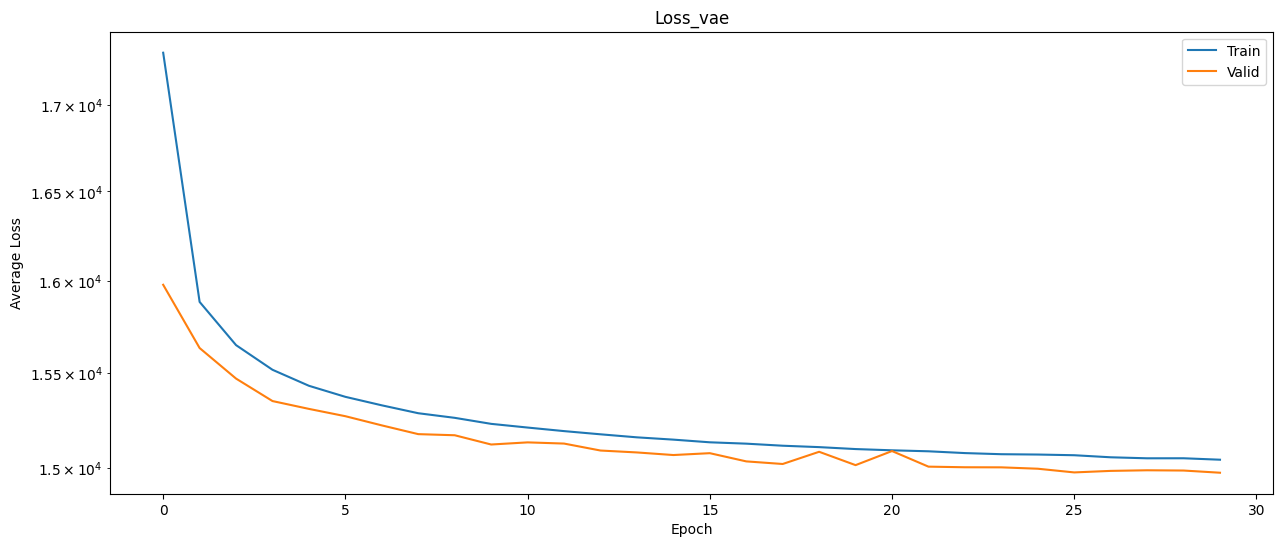

In [42]:
plt.figure(figsize=(15, 6))
plt.semilogy(history[0], label='Train')
plt.semilogy(history[1], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.title('Loss_vae')
plt.show()

On observe qu'après 15 époques, le modèle se stabilise et ne montre plus de diminution notable de la perte (je trouve quand même qu'on descend  pas beaucoup($\frac{2500}{15000}$) même si on reconstruit bien le label). Dans la suite on va utiliser le decodeur pour générer des images supervisé

In [44]:
for digit in range(10):  # Pour chaque chiffre de 0 à 9
    inputs = np.array([np.random.normal(0, 1, 12) for i in range(12)])
    labels = np.array([digit for i in range(12)])  # Labels correspondant au chiffre en cours
    
    with torch.no_grad():
        cvae.eval()
        # Génération des images à partir de l'espace latent et du label
        outputs = cvae.decode(
            torch.FloatTensor(inputs).to(DEVICE), 
            one_hot(labels, 9).to(DEVICE)
        ).view(12, 28, 28)
    
    # Affichage des images générées pour le chiffre actuel
    plot_gallery(outputs, labels, n_row=1, n_col=5)


## Partie III : modèle plus profond (CNN)
référence : https://www.kaggle.com/code/artemsolomko/encoders-on-mnist-pytorch/notebook#Conditional-VAE

Dans la suite, nous développons un modèle convolutionnel afin de mieux capturer les représentations locales et de réduire la dimension de l'espace latent.

In [12]:
dim_code = 4 #la dimension de l'espace latent

In [13]:
class cVAE(nn.Module):
    def __init__(self):
        super().__init__()
        # encoder

        self.label = nn.Embedding(10, dim_code)

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size = 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size = 4, stride=2, padding=1),
            nn.BatchNorm2d(128),#normalisation de chaque canal
            nn.ReLU()

        )

        self.flatten_mu = nn.Linear(128 * 7 * 7, out_features=dim_code)
        self.flatten_logsigma = nn.Linear(128 * 7 * 7, out_features=dim_code)

        # decoder

        self.decode_linear = nn.Linear(2*dim_code, 128 * 7 * 7)
        self.decode_2 = nn.ConvTranspose2d(in_channels=128, out_channels=64, 
                                        kernel_size=4, stride=2, padding=1)
        self.decode_1 = nn.ConvTranspose2d(in_channels=64, out_channels=1, 
                                        kernel_size=4, stride=2, padding=1)


    def encode(self, x, y):
        y = self.label(y)
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        mu, logsigma = self.flatten_mu(x), self.flatten_logsigma(x)
        x = self.gaussian_sampler(mu, logsigma)
        z = torch.cat((x, y), dim = 1)
        return z
    
    def gaussian_sampler(self, mu, logsigma):
        if self.training:
            std = torch.exp(logsigma / 2)
            eps = torch.empty_like(std).normal_()
            return eps.mul(std).add_(mu)
        else:
            return mu


    def decode(self, x, y):
        y = self.label(y)
        z = torch.cat((x, y), dim = 1)
        x = self.decode_linear(z)
        x = x.view(x.size(0), 128, 7, 7)
        x = F.relu(self.decode_2(x))
        reconstruction = F.sigmoid(self.decode_1(x))
        return reconstruction
    
    def forward(self, x, y):
        y = self.label(y)
        x1 = self.encoder(x)
        x = x1.view(x1.size(0), -1)
        mu, logsigma = self.flatten_mu(x), self.flatten_logsigma(x)
        x = self.gaussian_sampler(mu, logsigma)
        z = torch.cat((x, y), dim = 1)
        x = self.decode_linear(z)
        x = x.view(x.size(0), 128, 7, 7)
        x = F.relu(self.decode_2(x))
        reconstruction =  torch.sigmoid(self.decode_1(x))
        return reconstruction, mu, logsigma

Dans l'architecture que j'ai choisie, la moyenne et la variance dans l'espace latent dépendent uniquement de l'image, sans prendre en compte le label. Ce choix est motivé par le fait que la dimension de xx est beaucoup plus grande que celle des labels, rendant leur influence relativement négligeable et l'information est déja inclu dans l'image même. En revanche dans l'espace latent les dimensions de l'image et label sont les mêmes.

In [14]:
def train_epoch_cvae(model, criterion, optimizer, data_loader):

    train_losses_per_epoch = []
    model.train()
    for x_batch, y in data_loader:
        y = y.to(DEVICE)
        x_batch = x_batch.to(DEVICE)    
        mu, logsigma, reconstruction = model(x_batch, y)
        loss = criterion(x_batch.to(DEVICE).float(), mu, logsigma, reconstruction)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses_per_epoch.append(loss.item())

    return np.mean(train_losses_per_epoch), mu, logsigma, reconstruction

In [15]:
def eval_epoch_cvae(model, criterion, optimizer, data_loader):

    val_losses_per_epoch = []
    model.eval()
    with torch.no_grad():
        for x_val, y in data_loader:
            y = y.to(DEVICE)
            x_val = x_val.to(DEVICE)
            mu, logsigma, reconstruction = model(x_val, y)
            loss = criterion(x_val.to(DEVICE).float(), mu, logsigma, reconstruction)
            val_losses_per_epoch.append(loss.item())
    return np.mean(val_losses_per_epoch), mu, logsigma, reconstruction


In [19]:
def plot_output_cvae(model, epoch, epochs, train_loss, val_loss, size = 5):


    clear_output(wait=True)
    plt.figure(figsize=(18, 6))
    for k in range(size):
        ax = plt.subplot(2, size, k + 1)
        img, label = next(iter(val_dataset))
        img = img.to(DEVICE)
        label = label.to(DEVICE)
        model.eval()
        with torch.no_grad():
            reconstruction, mu, logsigma = model(img, label)

        plt.imshow(img[k].cpu().squeeze().numpy(), cmap='gray')
        plt.axis('off')
        plt.title(f'{class_names[label[k].item()]}')
        ax = plt.subplot(2, size, k + 1 + size)
        plt.imshow(reconstruction[k].cpu().squeeze().numpy(), cmap='gray')
        plt.axis('off')

        if k == size//2:
            ax.set_title('Output')
    plt.suptitle('%d / %d - loss: %f val_loss: %f' % (epoch+1, epochs, train_loss, val_loss))
    plt.show()


In [17]:
criterion = cvae_loss_fn
autoencoder_cvae = cVAE().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder_cvae.parameters(), lr=1e-3)

on va entrainer notre modèle sur 30 epochs

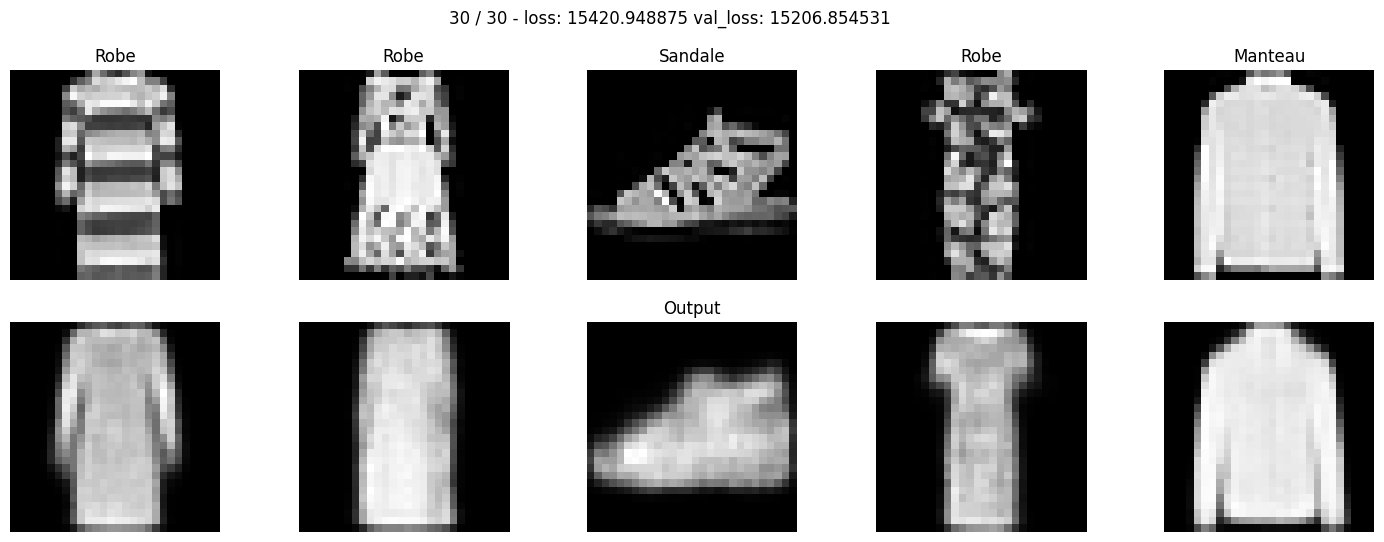

epoch: 100%|████████████████████████████████████| 30/30 [30:33<00:00, 61.12s/it]


In [107]:
epochs = 30
loss = {'train_loss':[],'val_loss':[]}
with tqdm(desc="epoch", total=epochs) as pbar_outer:
    for epoch in range(epochs):
        print('* Epoch %d/%d' % (epoch+1, epochs))
        train_loss, mu, logsigma, reconstruction = (train_epoch_cvae(autoencoder_cvae, 
                                                             criterion, 
                                                             optimizer, 
                                                             train_dataset
                                                             )
        )

        val_loss, mu, logsigma, reconstruction = (eval_epoch_cvae(autoencoder_cvae, 
                                                          criterion, 
                                                          optimizer, 
                                                          val_dataset)
        )
        pbar_outer.update(1)
      
        loss['train_loss'].append(train_loss)
        loss['val_loss'].append(val_loss)
        plot_output_cvae(autoencoder_cvae, epoch, epochs, train_loss, val_loss, size = 5)


Les courbes de pertes

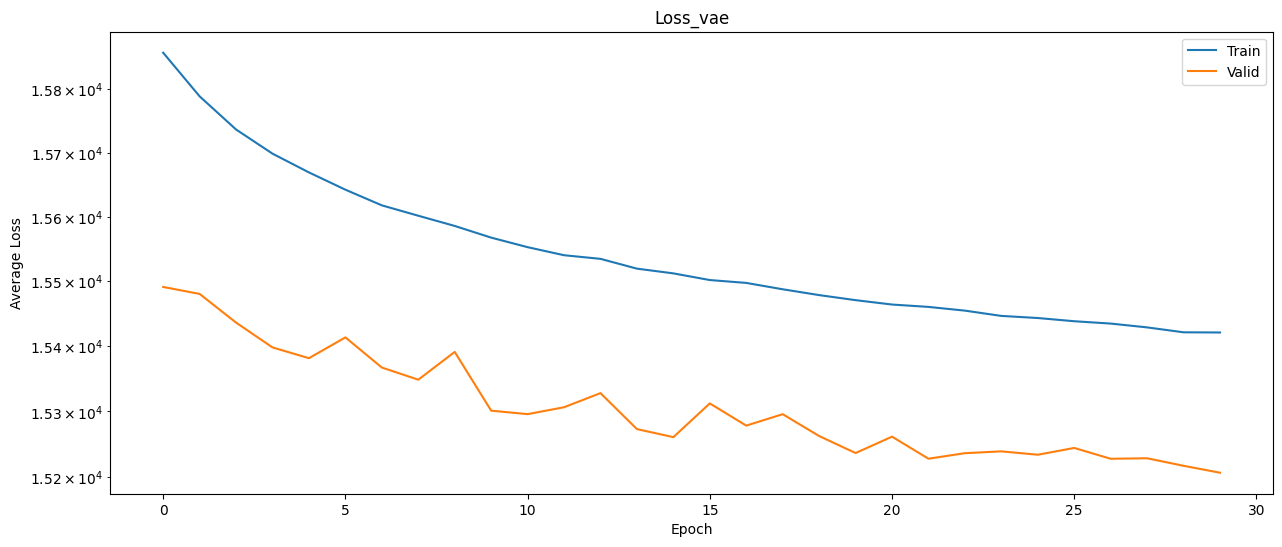

In [109]:
plt.figure(figsize=(15, 6))
plt.semilogy(loss['train_loss'], label='Train')
plt.semilogy(loss['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.title('Loss_vae')
plt.show()

In [ ]:
Utilisant le décodeur pour générer des images de sac

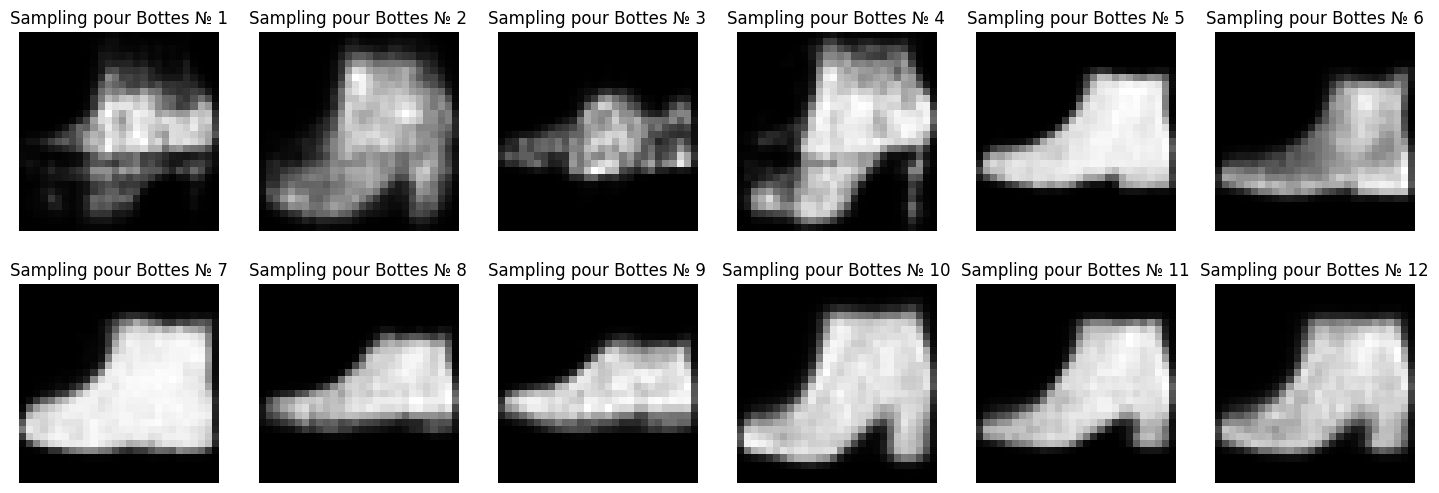

In [110]:
inputs = np.array([np.random.normal(0, 1, dim_code) for i in range(12)])
label_9 = np.array([9 for i in range(12)])
with torch.no_grad():
    autoencoder_cvae.eval()
    output = autoencoder_cvae.decode(torch.FloatTensor(inputs).to(DEVICE), 
                                   torch.IntTensor(label_9).to(DEVICE))
plt.figure(figsize=(18, 6))
for k in range(12):
    plt.subplot(2, 6, k+1)
    res = output[k].cpu().squeeze().detach().numpy()
    plt.imshow(res, cmap='gray')
    plt.title(f'Sampling pour Bottes № {k + 1}')
    plt.axis('off')    

## Représentation Latente

Voyons à quoi ressemblent les vecteurs latents dans l'espace. On va représenter les vecteurs latents des images sous forme de points dans un espace bidimensionnel.

Cela permettra d'estimer la densité de distribution des vecteurs latents de nos images dans cet espace.

### Étapes :

1. Obtenez les représentations latentes des images du jeu de test.


In [121]:
latent_space = []
from torch.utils.data import Dataset, DataLoader
test_loader = torch.utils.data.DataLoader(dataset=valuation_data,batch_size=1,shuffle=False)
for X, y in tqdm(test_loader):
    img = X.to(DEVICE)
    label = y.to(DEVICE)
    autoencoder_cvae.eval()
    with torch.no_grad():
        latent = autoencoder_cvae.encode(img, label)

    latent = latent.flatten().cpu().numpy()
    sample = {f"Encoded_{i}": encoded for i, encoded in enumerate(latent)}
    sample['label'] = label.item()
    latent_space.append(sample)
latent_space = pd.DataFrame(latent_space)

100%|███████████████████████████████████| 10000/10000 [00:09<00:00, 1105.72it/s]


2. Utilisez t-SNE (disponible dans sklearn) pour réduire la dimension de ces représentations à 2 (afin de pouvoir les visualiser sous forme de points dans l'espace).

In [123]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
digits_embedded = tsne.fit_transform(latent_space.drop(['label'],axis=1))
latent_space['label_name'] = latent_space['label'].apply(lambda x: class_names[x])
#latent_space['label']=latent_space['label'].astype(str)    

In [124]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
fig = px.scatter(digits_embedded, x=0, y=1, 
           color=latent_space['label_name'], opacity=0.7,
           
                 labels={
                     'color': "Classe "
                 },
                title="Latent space avec t-SNE")\
                .for_each_trace(lambda t: t.update(name=t.name.replace("=",": "))
                )
           
           

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                selector=dict(mode='markers'))
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_xaxes(visible=False, showticklabels=False)
fig.show();


<div align="center" style="background-color: #ffcc00; font-size: 60px; padding: 30px;">
  Merci
</div>
